In [21]:
import matplotlib.pyplot as plt
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
data_dir = '/home/autarkydotai/asalas/dphil/data'
start = '05-22-2006'
end = '04-22-2015'
symbols = ['GDX', 'GLD']
out = '/home/autarkydotai/asalas/dphil/scripts/gdx_gld.csv'

In [3]:
all_data = {symbol: pd.read_csv(os.path.join(data_dir, '{}.csv'.format(symbol)), index_col=0, parse_dates=True)
           for symbol in symbols}

In [4]:
prices = pd.DataFrame({symbol: data['Adj Close'] for symbol, data in all_data.items()})
prices.columns = [col.lower() for col in prices.columns]
prices = prices.loc[start:end]
prices.head()

,gdx,gld
Date,,
2006-05-22,33.280136,65.300003
2006-05-23,33.932686,66.379997
2006-05-24,32.645458,64.059998
2006-05-25,34.254494,64.699997
2006-05-26,34.460087,65.099998


In [5]:
# prices.to_csv(out)

In [33]:
INTERCEPT = False
# INTERCEPT = True
X = prices['gdx']
y = prices['gld']

lr = LinearRegression(fit_intercept=INTERCEPT)
lr.fit(X.to_numpy()[:, np.newaxis], y.to_numpy())
print(lr.coef_)

if INTERCEPT:
    X = sm.add_constant(X, prepend=False)
mod = sm.OLS(y.to_numpy(), X.to_numpy())
res = mod.fit()
print(res.params)

[2.9053182]
[2.9053182]


In [34]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                          2.002e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:21:03   Log-Likelihood:                         -11335.
No. Observations:                2245   AIC:                                  2.267e+04
Df Residuals:                    2244   BIC:                                  2.268e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<IPython.core.display.Javascript object>

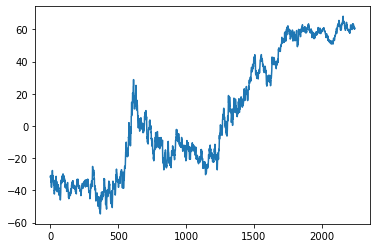

In [36]:
plt.plot(res.resid)

In [37]:
from math import INF

ImportError: cannot import name 'INF' from 'math' (unknown location)

In [38]:
import math

In [ ]:
math.M